# Noise Detection and Reduction Pipeline

This jupyter notebook demos how to use the ```noise_type_detector.py``` and ```noise_reduction_apply.py``` modules.  
Created by --> Veer Singh at Curl  

This module has 2 parts. First the type of noise is detected and flagged as either Gaussian, Impulse or None. Then according to the type of a noise a filter is applied. In the case of Gaussian noise a new type of gaussian noise removal algorithm is applied which i implemented using the paper[1]. In the case of Impulse noise, a median filter is applied. In the case where nither of those noises are detected, no filter is applied.

In [3]:
import cv2
from modules.noise_type_detector import NoiseTypeDetector
from modules.noise_reduction_apply import NoiseReductionApply
from IPython.display import Image
import os

Input parameter: Input image numpy array (grayscale)

Output: Image with noise removed (numpy array)

In [4]:
# Input
input_image_path = 'assets/impulse.jpg'
input_image = cv2.imread(input_image_path, 0)

## Input Image

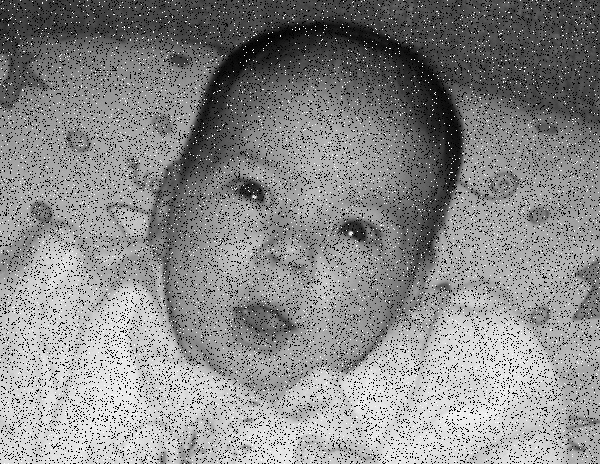

In [5]:
# Show the image
Image(input_image_path)

In [7]:
# Find type of noise and apply appropriate filter
gaussian_flag, impulse_flag = NoiseTypeDetector(input_image).flag()

if gaussian_flag == 1:
    print('Gaussian Noise Detected')
    output = NoiseReductionApply(input_image).paper_algo_gaussian_removal()
    print(gaussian_flag)
elif impulse_flag == 1:
    print('Impulse Noise Detected')
    output = NoiseReductionApply(input_image).median_blur()
    print(impulse_flag)
else:
    output = input_image
    print('No Noise Detected')

Impulse Noise Detected
1


As we can see it flagged this images as having Impulse noise

In [8]:
# Save the image
cv2.imwrite('output.png', output)

True

## Output Image

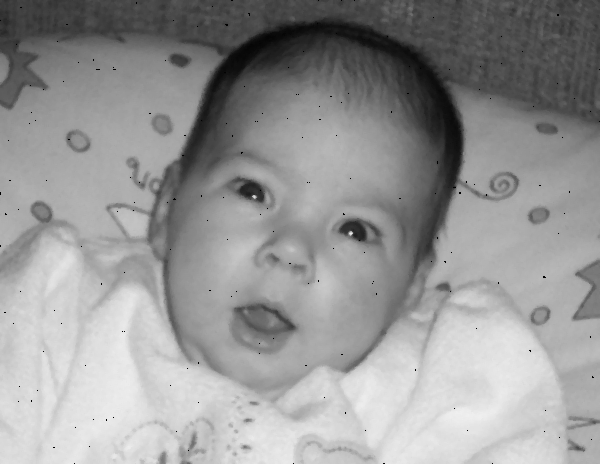

In [9]:
# Show the output
Image('Output.png')

In [10]:
# Delete the Output.png file
os.remove('Output.png')

## References
[1] S. Indu and Chaveli Ramesh. A noise fading technique for images highly corrupted with impulse noise. In 2007 International Conference on Computing: Theory and Applications (ICCTA’07), pages 627–632, 2007.